# Feature selection

## PCA

In [59]:
train = pd.read_csv('trainClean.csv')
test = pd.read_csv('testClean.csv')

In [60]:
NumberOfCustomers = train['NumberOfCustomers']
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = train.loc[:,all_data_index].append([test.loc[:,all_data_index]])
all_data = all_data.reset_index(drop=True)

In [61]:
numerical_cols = [col for col in all_data if all_data[col].dropna().value_counts().index.isin([0,1]).all()==0]
numerical_indx = pd.Index(numerical_cols)
numerical_variables = all_data[numerical_indx]

In [62]:
x = StandardScaler().fit_transform(numerical_variables)

Text(0,0.5,'Cumulative Explained Variance Ratio')

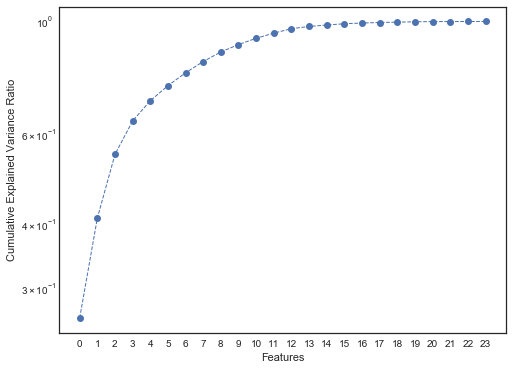

In [63]:
plt.semilogy(PCA().fit(x).explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,x.shape[1],1));
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")

In [64]:
n_components = 10
column_names = []
for i in range (0, n_components):
    col_name = "component {}".format(i+1);
    column_names.append(col_name)

In [65]:
pca = PCA(n_components)
new_data = pca.fit_transform(x)
pca_all_data = pd.DataFrame(data = new_data, 
                        columns = column_names)

In [66]:
print("Explained Variance")
for i in range (0, n_components):
    string = "component {} {}".format(i+1, pca.explained_variance_ratio_[i])
    print(string)
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))

Explained Variance
component 1 0.26241266316726264
component 2 0.14939905859654684
component 3 0.13713289777178397
component 4 0.0894228020518301
component 5 0.060838434837961586
component 6 0.04908629445646782
component 7 0.045014609482339485
component 8 0.04135986375124349
component 9 0.03684599568175085
component 10 0.029528910916331662
   Total Explained Variance 0.90


We finally decided to hold the first 10 pca

In [67]:
bool_cols = [col for col in all_data if all_data[col].dropna().value_counts().index.isin([0,1]).all()]
bool_indx = pd.Index(bool_cols)
bool_variables = all_data[bool_indx]

In [68]:
test_offset = train.shape[0]
finalTrain = pd.concat([pca_all_data.iloc[0:test_offset,:], bool_variables.iloc[0:test_offset,:]], axis=1)
finalTrain['NumberOfSales'] = train["NumberOfSales"]
finalTrain['NumberOfCustomers'] = train["NumberOfCustomers"]
finalTest = pd.concat([pca_all_data.iloc[test_offset:pca_all_data.shape[0],:], bool_variables.iloc[test_offset:pca_all_data.shape[0],:]], axis=1)

Store in finalTrain and finalTest the 10 pca + the binary variables

In [84]:
train = finalTrain
test = finalTest
#train = train.drop(labels='Unnamed: 0', axis=1) #there is this new misterious and useless column
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = pd.concat((train.loc[:,all_data_index],test.loc[:,all_data_index]), ignore_index=True)
columns = all_data.columns

In [85]:
x = all_data.values
min_max_scaler = MinMaxScaler()
all_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(x))
all_data_normalized.columns = columns

In [86]:
all_data_normalized.describe()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,October,November,December,Snow,Nothing,Hail,Thunderstorm,Rain,Fog,ZeroClouds
count,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,...,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000
mean,0.481627,0.445751,0.440529,0.476864,0.466292,0.348164,0.476544,0.471768,0.296269,0.385266,...,0.073293,0.073843,0.071758,0.077098,0.248940,0.009299,0.059390,0.584923,0.249934,0.000238
std,0.156752,0.133096,0.147608,0.179560,0.111261,0.100635,0.109330,0.150777,0.098072,0.104065,...,0.260618,0.261515,0.258087,0.266747,0.432399,0.095983,0.236353,0.492736,0.432975,0.015410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.362799,0.357169,0.340339,0.315306,0.395940,0.277341,0.408095,0.350600,0.230568,0.319339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.484430,0.440765,0.431581,0.467268,0.469982,0.338085,0.482806,0.473225,0.286190,0.374104,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.598008,0.530612,0.531957,0.635813,0.542160,0.408121,0.549567,0.596894,0.349254,0.433125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
test_offset = train.shape[0]
train_normalized = all_data_normalized.iloc[0:test_offset,:]
train_normalized['NumberOfSales'] = train["NumberOfSales"]
train_normalized['NumberOfCustomers'] = train["NumberOfCustomers"]
test_normalized = all_data_normalized.iloc[test_offset:all_data_normalized.shape[0],:]

# Feature selection

## Lasso feature selection

In [88]:
X_train_complete=train_normalized
X_test=test_normalized
# Regression on NumberOfCustomers
y=X_train_complete['NumberOfCustomers'].values.reshape(-1,1)
x=X_train_complete.drop(columns=['NumberOfCustomers','NumberOfSales'],axis=1)
x.columns

Index(['component 1', 'component 2', 'component 3', 'component 4',
       'component 5', 'component 6', 'component 7', 'component 8',
       'component 9', 'component 10', 'IsHoliday', 'HasPromotions',
       'StandardMarket', 'HyperMarket', 'SuperMarket', 'ShoppingCenter',
       'General', 'WithFishDepartment', 'WithNonFoodDepartment', 'Region0',
       'Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region6',
       'Region7', 'Region8', 'Region9', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'Snow', 'Nothing', 'Hail', 'Thunderstorm',
       'Rain', 'Fog', 'ZeroClouds'],
      dtype='object')

In [89]:
lasso = linear_model.LassoCV(cv=10)
lasso_fit=lasso.fit(x,y)
yp_lasso = lasso.predict(x)
r2_simple_train = r2_score(y,yp_lasso)
rmse_simple_train = mean_squared_error(y,yp_lasso,multioutput='raw_values')
print("Linear Regression with Lasso")
print("==================================================")
print("\t                  Train R2=%.3f"%(r2_simple_train))
print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
print("\nLinear Regression with Lasso - Chosen Features")
selected=[]
threshold=1
for i,c in enumerate(np.append(lasso_fit.intercept_,lasso_fit.coef_)):
    #print("%d\t%3.3f" % (i,c) )
    if abs(c)>threshold and not i == 0:
        selected.append(x.columns[i-1])
x=x[selected]
x.columns

Linear Regression with Lasso
	                  Train R2=0.321
	                  Train RMSE=16968.712

Linear Regression with Lasso - Chosen Features


Index(['component 1', 'component 2', 'component 3', 'component 5',
       'component 6', 'component 7', 'component 8', 'component 9',
       'component 10', 'HasPromotions', 'StandardMarket', 'HyperMarket',
       'ShoppingCenter', 'General', 'WithFishDepartment', 'Region0', 'Region1',
       'Region2', 'Region3', 'Region4', 'Region5', 'Region6', 'Region7',
       'Region8', 'Region9', 'January', 'February', 'April', 'May', 'June',
       'September', 'October', 'November', 'December', 'Snow', 'Fog'],
      dtype='object')

# Super Clean Dataset Creation
Given pca and lasso we decided to leave just the seleted features in order to train faster our models

In [90]:
all_data_final = pd.concat((finalTrain.loc[:,all_data_index],finalTest.loc[:,all_data_index]), ignore_index=True)

In [91]:
all_data_final = all_data_final.drop(columns=['component 4','IsHoliday','SuperMarket','WithNonFoodDepartment','March','July','August','Hail','Nothing','Rain','Thunderstorm','ZeroClouds'],axis=1)

In [92]:
test_offset = finalTrain.shape[0]
finalTrain = all_data_final.iloc[0:test_offset,:]
finalTrain['NumberOfCustomers'] = train["NumberOfCustomers"]
finalTrain['NumberOfSales'] = train["NumberOfSales"]
finalTest = all_data_final.iloc[test_offset:pca_all_data.shape[0],:]

In [93]:
finalTrain.to_csv("FinalTrain.csv")
finalTest.to_csv("FinalTest.csv")